## Importing modules to use google drive 

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 3.5MB/s 


## Authenticating account 

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



## Downloading file from google drive 
Zip file 

In [0]:
fid = drive.ListFile({'q':"title='kagglecatsanddogs.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('kagglecatsanddogs.zip')

## Unzipping file 

In [0]:
!unzip kagglecatsanddogs.zip

### Total number of cats and dogs images 

In [0]:
import os 

print('Number of Cat Images :', len(os.listdir('PetImages/Cat')))
print('Number of Dog Images :', len(os.listdir('PetImages/Dog')))

Number of Cat Images : 12501
Number of Dog Images : 12501


## Making Directories for Training, Validation and Testing the Model

In [0]:
import os,shutil 

original_dir='PetImages'           # original directory downloaded from google drive 
base_dir="data"                    # base directory where we will separate training, validation and testing data 

os.mkdir(base_dir)                 # making the base directory 


In [0]:
# Making the training directory 
train_dir=os.path.join(base_dir,"train")
os.mkdir(train_dir)

# Making the Validation directory 
validation_dir=os.path.join(base_dir,"validation")
os.mkdir(validation_dir)

# Making the test directory
test_dir=os.path.join(base_dir,"test")
os.mkdir(test_dir)


### Number of categories in the data 

In [0]:
categories=[i for i in os.listdir(original_dir)]   # list of categories in the data 

num_classes=len(categories)                        # number of categories in the data

print('Number of Classes : ',num_classes)
print('Categories : ',categories)

Number of Classes :  2
Categories :  ['Dog', 'Cat']


### Making Directories for each category in the training, validation and testing directory.

In [0]:
c=[]

# directories for training pictures 
for j in categories:
  c.append(os.path.join(train_dir,j))
  

# directories for validation pictures
for j in categories:
  c.append(os.path.join(validation_dir,j))
  

#directories for test pictures 
for j in categories:
  c.append(os.path.join(test_dir,j))
  

print(c)

for i in c:
  os.mkdir(i)   #making directories 

['data/train/Dog', 'data/train/Cat', 'data/validation/Dog', 'data/validation/Cat', 'data/test/Dog', 'data/test/Cat']


### Making list of training directories 

In [0]:
train_categories=[]
for i in categories:
  train_categories.append(base_dir+'/'+"train"+"/"+i)
  
print(train_categories)

['data/train/Dog', 'data/train/Cat']


### Making list of validation directories

In [0]:
validation_categories=[]
for i in categories:
  validation_categories.append(base_dir+'/'+"validation"+"/"+i)
  
print(validation_categories)

['data/validation/Dog', 'data/validation/Cat']


### Making list of testing directories

In [0]:
test_categories=[]
for i in categories:
  test_categories.append(base_dir+'/'+"test"+"/"+i)
  
print(test_categories)

['data/test/Dog', 'data/test/Cat']


### Making list of original directories

In [0]:
original_dataset=[]
for i in categories:
  original_dataset.append(original_dir+"/"+i)
  
print(original_dataset)

['PetImages/Dog', 'PetImages/Cat']


### Copying the first 1000 images of each category in training directory of each category.
### Copying the next 300 images of each category in validation directory of each category.
### Copying the 200 images of each category in testing directory of each category.

In [0]:
# Copy first 1000 images to train
for i,j in enumerate(categories):
  
  fnames = [x for x in os.listdir(original_dir+'/'+j)[0:1000]]

  for fname in fnames:
      src = os.path.join(original_dataset[i], fname)
      dst = os.path.join(train_categories[i], fname)
      shutil.copyfile(src, dst)
    

In [0]:
#Copy next 300 images for validation

for i,j in enumerate(categories):
  
  fnames = [x for x in os.listdir(original_dir+'/'+j)[1000:1300]]

  for fname in fnames:
      src = os.path.join(original_dataset[i], fname)
      dst = os.path.join(validation_categories[i], fname)
      shutil.copyfile(src, dst)
    

In [0]:
#Copy next 200 images for test

for i,j in enumerate(categories):
  
  fnames = [x for x in os.listdir(original_dir+'/'+j)[1300:1500]]

  for fname in fnames:
      src = os.path.join(original_dataset[i], fname)
      dst = os.path.join(test_categories[i], fname)
      shutil.copyfile(src, dst)

## Counting the total number of Training, Validation and Testing Images

In [0]:
# Total number of training images 
train_img_count=0
for i in os.listdir(base_dir+'/'+"train"):
  train_img_count+=len(os.listdir(base_dir+'/'+'train'+'/'+i))
  
# Total number of Validation Images 
validation_img_count=0
for i in os.listdir(base_dir+'/'+'validation'):
  validation_img_count+=len(os.listdir(base_dir+'/'+'validation'+'/'+i))
  
# Total number of Testing Images 
test_img_count=0
for i in os.listdir(base_dir+'/'+'test'):
  test_img_count+=len(os.listdir(base_dir+'/'+'test'+'/'+i))
  
print('Total Training Images :', train_img_count)
print('Total validation Images:', validation_img_count)
print('Total Test Images:', test_img_count)

Total Training Images : 2000
Total validation Images: 600
Total Test Images: 400


## Creating Model 

In [0]:
import keras 
import numpy as np  

Using TensorFlow backend.


In [0]:
img_height = 150    
img_width = 150
BATCH_SIZE = 32

In [0]:
# Importing layers and models from keras
from keras import layers
from keras import models

model = models.Sequential()                                                     # Creating Sequential Model

model.add(layers.Conv2D(32, (3, 3), activation='relu',                          # Adding First Convolutional layer in the network
                        input_shape=(img_height,img_width, 3)))

model.add(layers.MaxPooling2D((2, 2)))                                          # adding First Pooling layer in the network

model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))          # Adding Second Convolutional layer in the network

model.add(layers.MaxPooling2D((2, 2)))                                          # Adding Second Pooling layer in the network
 

model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))         # Adding Third Convolutional layer in the network 

model.add(layers.MaxPooling2D((2, 2)))                                          # Adding Third Pooling layer in the network

                                         
model.add(layers.Flatten())                                                     # Flattening the layers (Making it into one dimensional from 3 dimensional)
                                                             
model.add(layers.Dense(512, activation='relu'))                                 # Adding Dense Layer with 512 neurons

model.add(layers.Dense(1, activation='sigmoid'))                                # Adding Output Dense Layer with sigmoid activation function

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 41472)             0         
__________

##Compiling the model 

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Data Preprocessing 

In [0]:
from keras.preprocessing.image import ImageDataGenerator


# Data Augumentation with training data 
train_datagen = ImageDataGenerator( rescale=1./255)                        # Normalizing Images, means all pixel values will be in the range (0,1) 

test_datagen = ImageDataGenerator(rescale=1./255)


# Converting the data into Batches for easier processing 
train_generator = train_datagen.flow_from_directory(
                                train_dir,                                  # This is the target directory
                                target_size=(img_height, img_width),        # All images will be resized to (img_height x img_width) 
                                batch_size=BATCH_SIZE,
                                class_mode='binary'                         # Since we use binary_crossentropy loss, we need binary labels
                                )


validation_generator = test_datagen.flow_from_directory(
                                validation_dir,
                                target_size=(img_height, img_width),
                                batch_size=BATCH_SIZE,
                                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


##Training model 

In [0]:
# Train the model
batch_size = BATCH_SIZE
train_steps_per_epoch = train_img_count // batch_size
val_steps_per_epoch = validation_img_count // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=validation_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=10, 
                              shuffle=True,
                              verbose=1)   

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipp

62/62 [==============================] - 148s 2s/step - loss: 0.7687 - acc: 0.5343 - val_loss: 0.6843 - val_acc: 0.6007
Epoch 2/10
62/62 [==============================] - 146s 2s/step - loss: 0.6691 - acc: 0.5907 - val_loss: 0.6503 - val_acc: 0.6373
Epoch 3/10
62/62 [==============================] - 144s 2s/step - loss: 0.6436 - acc: 0.6311 - val_loss: 0.6508 - val_acc: 0.6408
Epoch 4/10
62/62 [==============================] - 146s 2s/step - loss: 0.5668 - acc: 0.7001 - val_loss: 0.6650 - val_acc: 0.6250
Epoch 5/10
62/62 [==============================] - 148s 2s/step - loss: 0.5182 - acc: 0.7364 - val_loss: 0.8681 - val_acc: 0.5986
Epoch 6/10
62/62 [==============================] - 149s 2s/step - loss: 0.3981 - acc: 0.8120 - val_loss: 0.9464 - val_acc: 0.6496
Epoch 7/10
62/62 [==============================] - 148s 2s/step - loss: 0.2497 - acc: 0.8916 - val_loss: 1.1877 - val_acc: 0.6197
Epoch 8/10
62/62 [==============================] - 148s 2s/step - loss: 0.1716 - acc: 0.9310 

In [0]:
model.save('cats_and_dogs_small_1.h5')

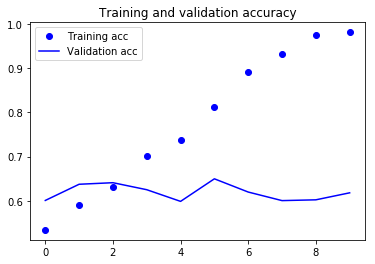

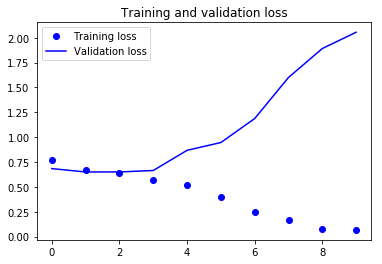

In [58]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing the Model 

In [0]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height,img_width),
        batch_size=BATCH_SIZE,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test accuracy :', test_acc)
print('test loss :', test_loss)

## Using Data Augmentation

## Let's train our network using data augmentation and dropout

In [0]:
# Importing layers and models from keras
from keras import layers
from keras import models

model = models.Sequential()                                                     # Creating Sequential Model

model.add(layers.Conv2D(32, (3, 3), activation='relu',                          # Adding First Convolutional layer in the network
                        input_shape=(img_height,img_width, 3)))

model.add(layers.MaxPooling2D((2, 2)))                                          # adding First Pooling layer in the network

model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))          # Adding Second Convolutional layer in the network

model.add(layers.MaxPooling2D((2, 2)))                                          # Adding Second Pooling layer in the network
 

model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))         # Adding Third Convolutional layer in the network 

model.add(layers.MaxPooling2D((2, 2)))                                          # Adding Third Pooling layer in the network

model.add(layers.Dropout(0.5))                                                  # Adding Dropout Layer 

model.add(layers.Flatten())                                                     # Flattening the layers (Making it into one dimensional from 3 dimensional)
                                                             
model.add(layers.Dense(512, activation='relu'))                                 # Adding Dense Layer with 512 neurons

model.add(layers.Dense(1, activation='sigmoid'))                                # Adding Output Dense Layer with sigmoid activation function

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 18, 18, 128)       0         
__________

In [0]:
# Compiling Model 

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
from keras.preprocessing.image import ImageDataGenerator


# Data Augumentation with training data 
train_datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)                    # Normalizing Images, means all pixel values will be in the range (0,1) 

test_datagen = ImageDataGenerator(rescale=1./255)


# Converting the data into Batches for easier processing 
train_generator = train_datagen.flow_from_directory(
                                train_dir,                                  # This is the target directory
                                target_size=(img_height, img_width),        # All images will be resized to (img_height x img_width) 
                                batch_size=BATCH_SIZE,
                                class_mode='binary'                         # Since we use binary_crossentropy loss, we need binary labels
                                )


validation_generator = test_datagen.flow_from_directory(
                                validation_dir,
                                target_size=(img_height, img_width),
                                batch_size=BATCH_SIZE,
                                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [69]:
# Train the model
batch_size = BATCH_SIZE
train_steps_per_epoch = train_img_count // batch_size
val_steps_per_epoch = validation_img_count // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=validation_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=10, 
                              shuffle=True,
                              verbose=1)   

Epoch 1/10
25/62 [===========>..................] - ETA: 1:33 - loss: 0.8768 - acc: 0.5050

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but 

61/62 [============================>.] - ETA: 2s - loss: 0.7698 - acc: 0.4933

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


62/62 [==============================] - 163s 3s/step - loss: 0.7686 - acc: 0.4924 - val_loss: 0.6927 - val_acc: 0.5069
Epoch 2/10
62/62 [==============================] - 158s 3s/step - loss: 0.6936 - acc: 0.5106 - val_loss: 0.6925 - val_acc: 0.5335
Epoch 3/10
62/62 [==============================] - 157s 3s/step - loss: 0.6919 - acc: 0.5297 - val_loss: 0.6893 - val_acc: 0.5229
Epoch 4/10
62/62 [==============================] - 158s 3s/step - loss: 0.6910 - acc: 0.5348 - val_loss: 0.6799 - val_acc: 0.5599
Epoch 5/10
62/62 [==============================] - 156s 3s/step - loss: 0.6780 - acc: 0.5509 - val_loss: 0.6828 - val_acc: 0.5511
Epoch 6/10
62/62 [==============================] - 157s 3s/step - loss: 0.6902 - acc: 0.5363 - val_loss: 0.6873 - val_acc: 0.5440
Epoch 7/10
62/62 [==============================] - 157s 3s/step - loss: 0.6874 - acc: 0.5590 - val_loss: 0.6850 - val_acc: 0.5511
Epoch 8/10
62/62 [==============================] - 159s 3s/step - loss: 0.6841 - acc: 0.5575 

In [0]:
model.save('cats_and_dogs_small_2.h5')

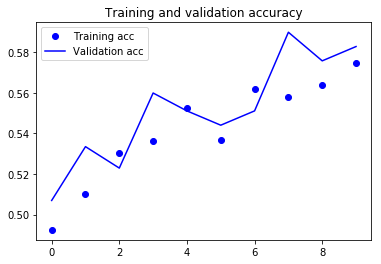

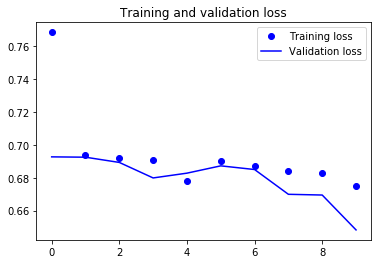

In [70]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing the Model 

In [71]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height,img_width),
        batch_size=BATCH_SIZE,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test accuracy :', test_acc)
print('test loss :', test_loss)

Found 400 images belonging to 2 classes.
test accuracy : 0.5960051546391752
test loss : 0.6546142893968169
